# Lead Scoring Case Study Using Logistic Regression

## Problem Statment :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

__When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.__

## Goal : 

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

# for visulisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for ignore warning 
import warnings
warnings.filterwarnings('ignore')

# for display maximum number of rows and columns
from IPython.display import display
pd.set_option('display.max_columns', 60)
pd.options.display.max_rows = 9500


In [2]:
# for train-test splitng data
from sklearn.model_selection import train_test_split
# for Scaling the data
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

## Step 1: Importing Data

In [3]:
lead = pd.read_csv(r"C:\Users\Niks\Downloads\ML-1\Group case study\Lead Scoring Assignment\Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
lead.shape

(9240, 37)

In [5]:
# Check the datatype of all columns
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [6]:
# let's look at the statistical aspects of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 3 : Cleaning Data

In [7]:
# As we can seen in Dataset in some columns select values is present 
# So it means that users not select any option thats why  by default it will choose select 
# So we can say that Select valuse as good as Unknown values in Dataset

# lets convert select to nan values
lead = lead.replace('Select','unknown')

In [8]:
## Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function
lead.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [9]:
# Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places

(round(lead.isnull().sum()/len(lead.index), 2)*100).sort_values(ascending=False)

Lead Quality                                     52.0
Asymmetrique Profile Score                       46.0
Asymmetrique Activity Score                      46.0
Asymmetrique Profile Index                       46.0
Asymmetrique Activity Index                      46.0
Tags                                             36.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Lead Profile                                     29.0
Country                                          27.0
How did you hear about X Education               24.0
Specialization                                   16.0
City                                             15.0
TotalVisits                                       1.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                 

In [10]:
# Get the row-wise Null count the same way. This time just specify the axis as 1
lead.isnull().sum(axis=1)

0        1
1        1
2        0
3        0
4        0
5        9
6        0
7        9
8        6
9        5
10       0
11       1
12       0
13       1
14       2
15       0
16       9
17       0
18       2
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       0
30       0
31       0
32       0
33       8
34       0
35       0
36       0
37       0
38       0
39       0
40       1
41       0
42       1
43       5
44       1
45       0
46       0
47       9
48       0
49       9
50       1
51       1
52       0
53       8
54       8
55       1
56       0
57       0
58       1
59       0
60       0
61       2
62       0
63       9
64       0
65       0
66       0
67       1
68       1
69       2
70       0
71       1
72       0
73       0
74       6
75       0
76       0
77       6
78       1
79       4
80       0
81       6
82       1
83       9
84       0
85       1
86       1
87       6
88       4
89       1
90       1

### 3.1 Treat Missing values

In [11]:
# We can Drop the columns having more than 45% Missing value
Drop_Missing_Columns = lead.columns[100*(lead.isnull().sum()/len(lead.index)) > 30]
lead = lead.drop(Drop_Missing_Columns, axis=1)
lead.shape

(9240, 31)

In [12]:
# Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places

(round(lead.isnull().sum()/len(lead.index), 2)*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.0
Lead Profile                                     29.0
What is your current occupation                  29.0
Country                                          27.0
How did you hear about X Education               24.0
Specialization                                   16.0
City                                             15.0
TotalVisits                                       1.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Converted                                         0.0
Total Time Spent on Website                       0.0
Do Not Call                                       0.0
Last Notable Activity                             0.0
A free copy of Mastering The

In [13]:
# check for " What matters most to you in choosing a course " column
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [14]:
# replace all missing value with Better Career Prospects
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [15]:
# check for the Country columns
lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

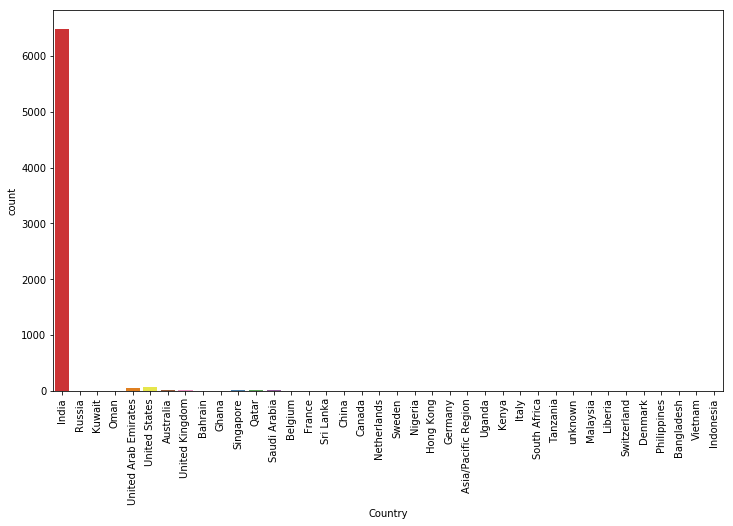

In [16]:
from matplotlib.pyplot import xticks
%matplotlib inline

fig, axs = plt.subplots(figsize = (12,7))
sns.countplot(lead.Country,palette="Set1")
xticks(rotation=90)

In [17]:
# replace all missing value with india
lead['Country'] = lead['Country'].replace(np.nan,'India')

In [18]:
# check for the Lead Profile columns
lead['Lead Profile'].describe()

count        6531
unique          6
top       unknown
freq         4146
Name: Lead Profile, dtype: object

In [19]:
# replace all missing value with unknown
lead['Lead Profile'] = lead['Lead Profile'].replace(np.nan,'unknown')

In [20]:
# check for the Lead Profile columns
lead['How did you hear about X Education'].describe()

count        7033
unique         10
top       unknown
freq         5043
Name: How did you hear about X Education, dtype: object

In [21]:
# replace all missing value with unknown
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace(np.nan,'unknown')

In [22]:
# check for the Lead Profile columns
lead['Specialization'].describe()

count        7802
unique         19
top       unknown
freq         1942
Name: Specialization, dtype: object

In [23]:
# replace all missing value with unknown
lead['Specialization'] = lead['Specialization'].replace(np.nan,'unknown')

In [24]:
# check for the Lead Profile columns
lead['City'].describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

In [25]:
# replace all missing value with unknown
lead['City'] = lead['City'].replace(np.nan,'unknown')

#### As column " What is your currennt occupation" has around 29.44% of missing values, Lets drop the column

In [26]:
lead = lead.drop('What is your current occupation', axis = 1 )

In [27]:
# Lets Drop the Row whose value having 1%
lead.dropna(inplace = True)

In [28]:
# Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places

(round(lead.isnull().sum()/len(lead.index), 2)*100)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [29]:
lead.shape

(9074, 30)

In [30]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### As we can see Data is cleaned and There is no missing value in Data

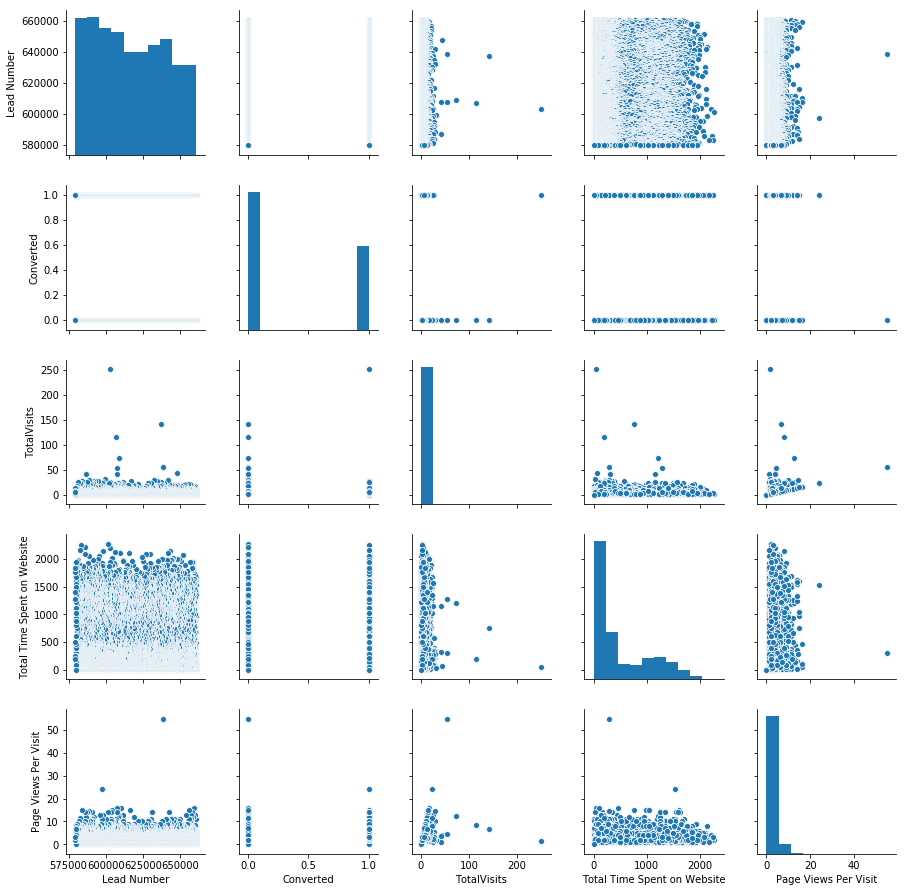

In [31]:
sns.pairplot(lead,palette="Set1")
plt.show()

## Checking the outlier

In [32]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


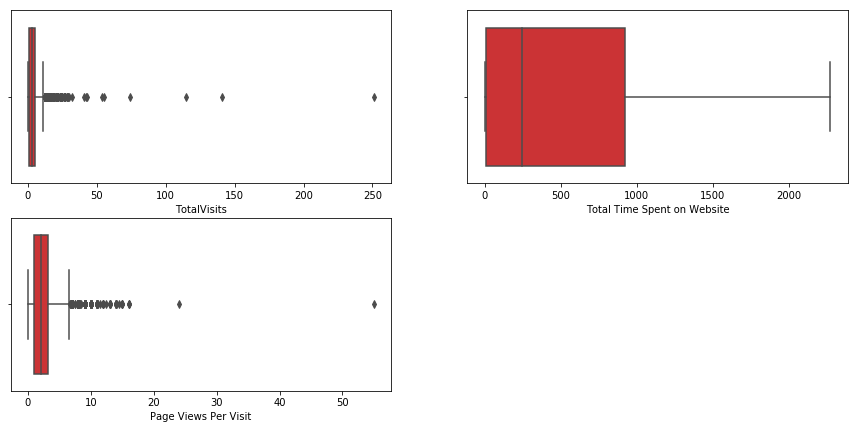

In [33]:
# For TotalVisits
fig, axs = plt.subplots(figsize = (15,7))
plt.subplot(2,2,1)
sns.boxplot(lead['TotalVisits'],palette="Set1")
plt.savefig("Total visit",bbox_inches='tight')

# For Total Time Spent on Website
plt.subplot(2,2,2)
sns.boxplot(lead['Total Time Spent on Website'],palette="Set1")

# For Total Page Views Per Visit
plt.subplot(2,2,3)
sns.boxplot(lead['Page Views Per Visit'],palette="Set1")
plt.savefig("Page view per visit",bbox_inches='tight')


- we can see there is outlier in the total visits and Page views per visit 

### Treat Outlier

In [34]:
# Total visits
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'] [lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'] [lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

# Page views per visit
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'] [lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'] [lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

# Total Time Spent on Website
percentiles = lead['Total Time Spent on Website'].quantile([0.05,0.95]).values
lead['Total Time Spent on Website'] [lead['Total Time Spent on Website'] <= percentiles[0]] = percentiles[0]
lead['Total Time Spent on Website'] [lead['Total Time Spent on Website'] >= percentiles[1]] = percentiles[1]

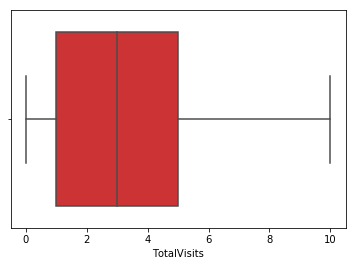

In [35]:
sns.boxplot(lead['TotalVisits'],palette="Set1")

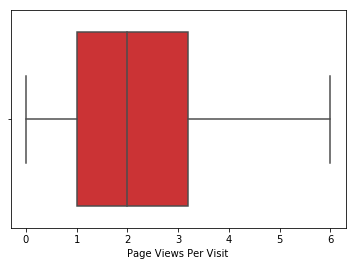

In [36]:
sns.boxplot(lead['Page Views Per Visit'],palette="Set1")

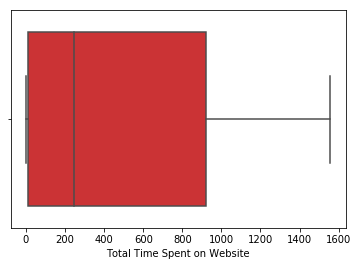

In [37]:
sns.boxplot(lead['Total Time Spent on Website'],palette="Set1")

- Now the Data is clear we remove the outlier

## Step 4 : Exploratory Data Analysis

### As per Dataset Converted is the target varibale. So we ll perform analysis with (hue = Converted )with all Variable 

In [38]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### 1) Lead Origin

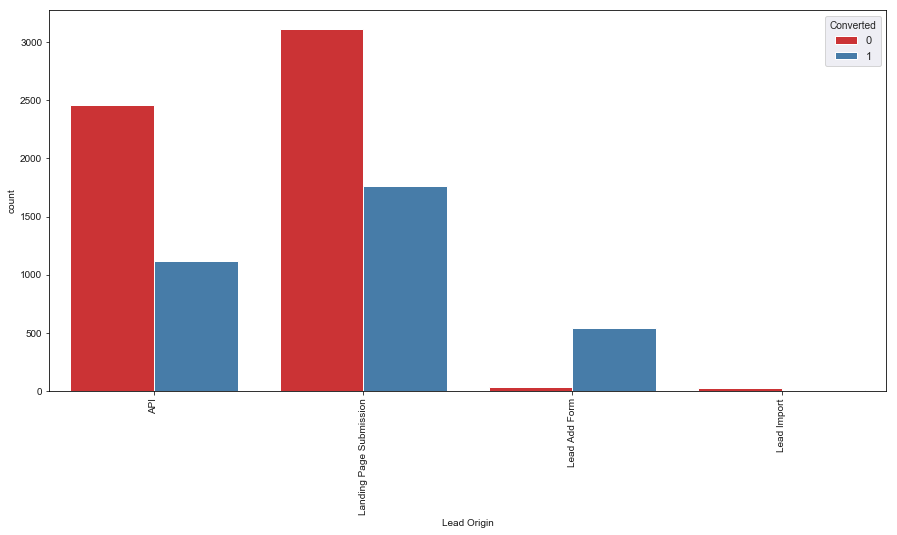

In [39]:
# make the countplot on X axis Lead origin with 'Hue = Converted which is target variable'
fig, axs = plt.subplots(figsize = (15,7))
sns.set(style="darkgrid")
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)
plt.savefig("Lead Origin",bbox_inches='tight')

- As per above plot we can see most of the lead is converted from API and Landing page submission 
- Also Lead Add From hase the very good rate of Lead conversion but the count of lead is very less

#### So to improve the overall performance we have to focus on API & landing page submission and also genrate more lead from the Lead add form

### 2) Lead Source

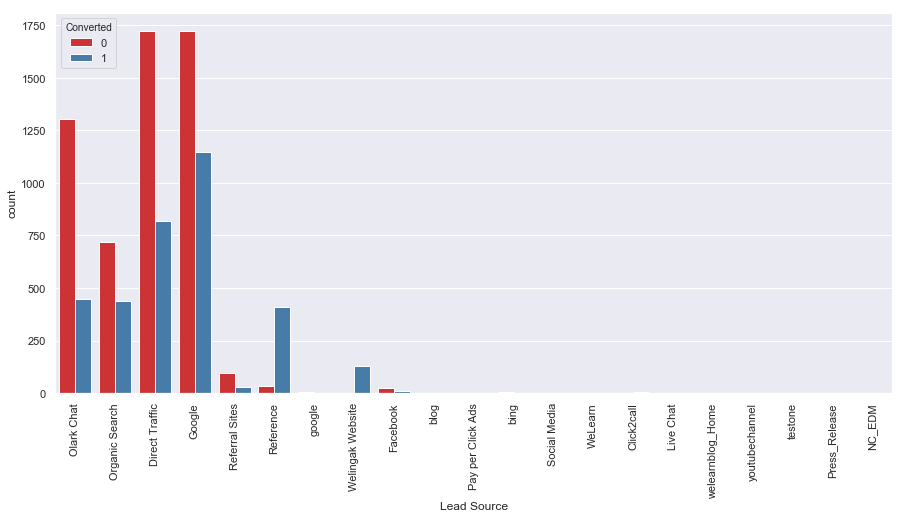

In [40]:
# make the countplot on X axis Lead Source with 'Hue = Converted which is target variable'
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)
plt.savefig("Lead Source",bbox_inches='tight')

- As we see Google & Direct Traffic Genrate the number of leads
- on the other side , Reference & Welingak has the high number of chance to convert the leads

__conclusion__ :

_To improve overall lead conversion rate, we should focus on olark chat, organic search, direct traffic, and google and generate more leads from reference and welingak website._

### 3) Do not E-mail & Do not Call

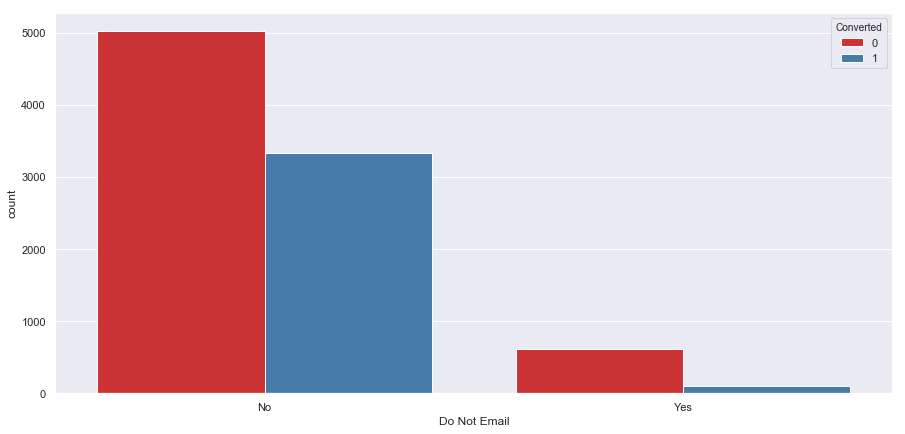

In [41]:
# make the countplot on X axis Do Not Email with 'Hue = Converted which is target variable'
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead,palette="Set1")

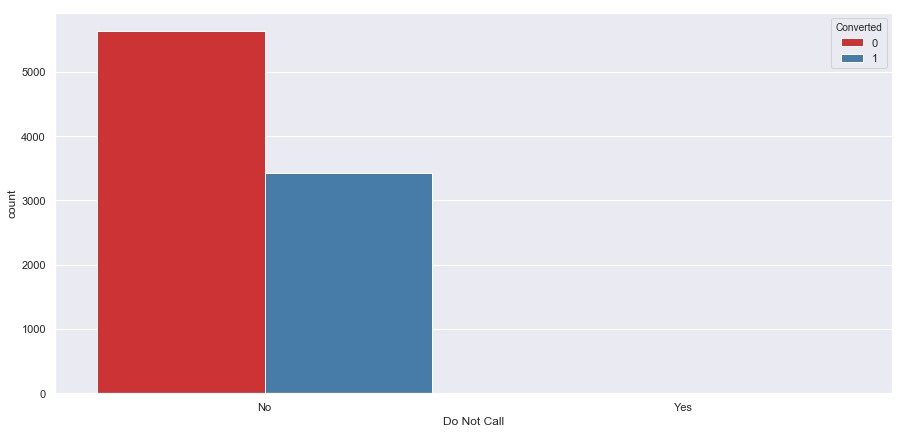

In [42]:
# make the countplot on X axis Do not Call with 'Hue = Converted which is target variable'
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead,palette="Set1")

- As we see in Both Do not email & Do not call In No option there is some lead is generated but in yes there is not lead converted and most of people choose yes option

### 4)  Total time spent on website

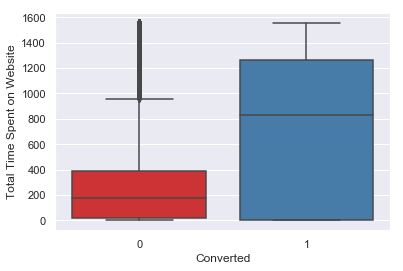

In [43]:
# make the countplot on X axis Total Time Spent on Website with 'Hue = Converted which is target variable'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead,palette="Set1")
plt.savefig("Total Time spend on website",bbox_inches='tight')

- We can say that people who spending more time on website lead will be converted

### 5) Total Visits

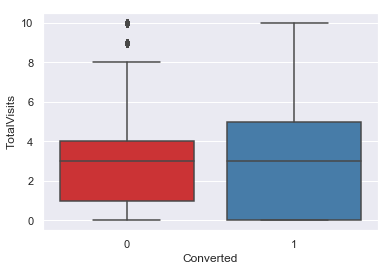

In [44]:
# make the countplot on X axis Total Visits with 'Hue = Converted which is target variable'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead,palette="Set1")
plt.savefig("Total Visits",bbox_inches='tight')

### 6) Page Views Per Visit

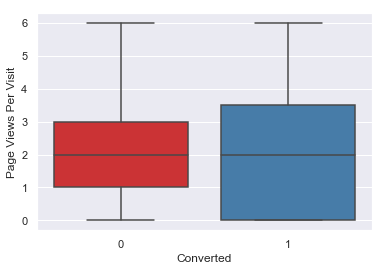

In [45]:
# make the countplot on X axis Page Views Per Visit with 'Hue = Converted which is target variable'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead,palette="Set1")
plt.savefig("Page view per visit",bbox_inches='tight')

### 7) Last Activity

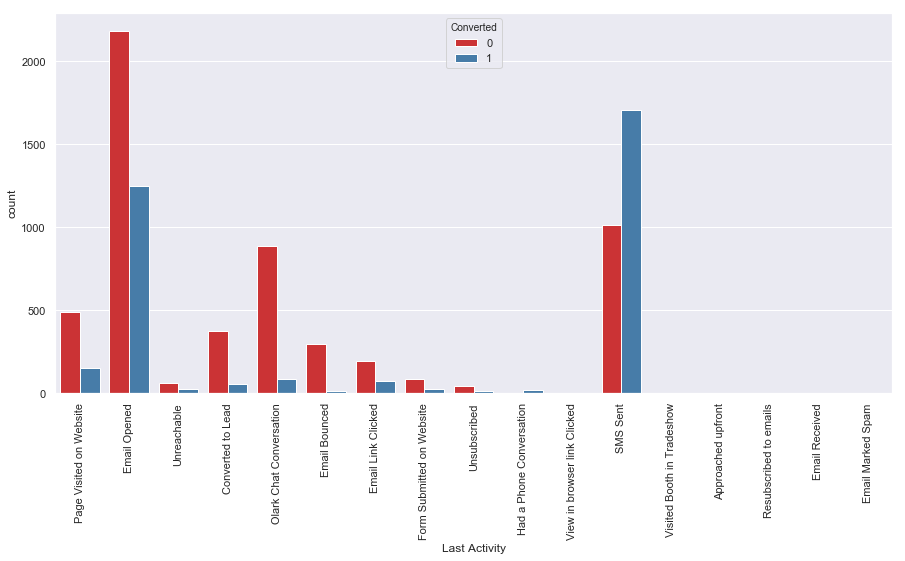

In [46]:
# make the countplot on X axis Last Activity with 'Hue = Converted which is target variable'
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead,palette="Set1")
xticks(rotation=90)
plt.savefig("Last Activity",bbox_inches='tight')

- As we see most of the converstion rate for leads come through the SMS alerts Almost 65% rate
- Also we can say that Email opend has the most of the lead as their last Activity

### 8) Country

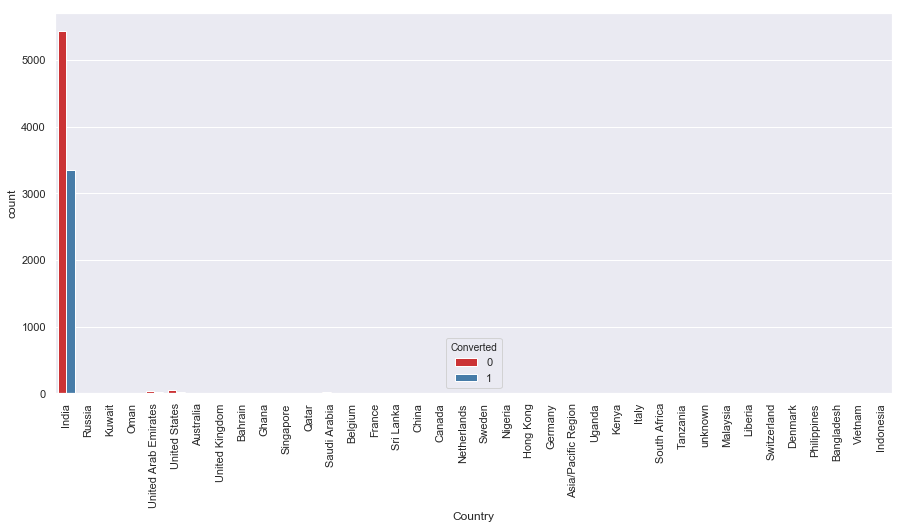

In [47]:
# make the countplot on X axis Country 'Hue = Converted which is target variable'
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "Country", hue = "Converted", data = lead,palette="Set1")
xticks(rotation=90)
plt.savefig("Country",bbox_inches='tight')

- As we clearly seen india has the only country to target for lead generated.

### 9) City

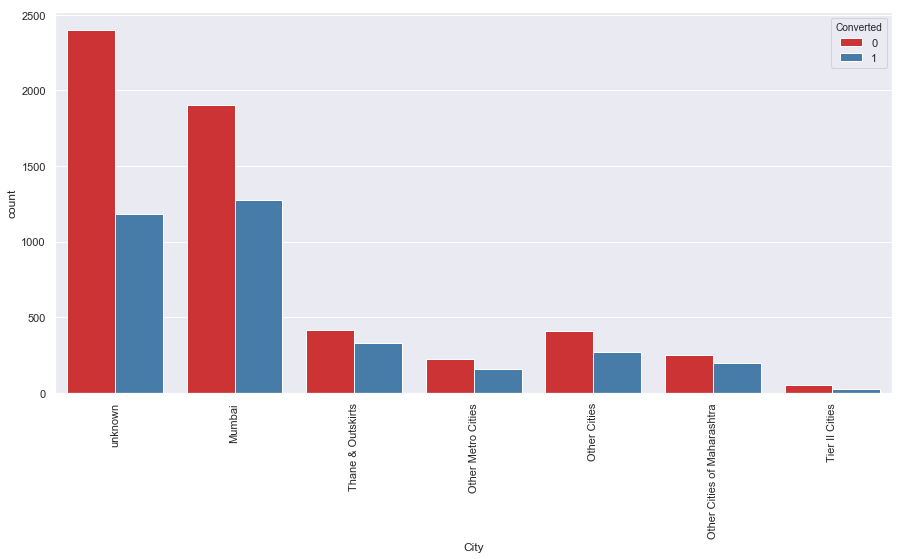

In [48]:
# make the countplot on X axis Country 'Hue = Converted which is target variable'
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "City", hue = "Converted", data = lead,palette="Set1")
xticks(rotation=90)
plt.savefig("City",bbox_inches='tight')

- As we seen Most of the lead and conversition comes from mumbai

### 10) NewsPaper , Search , Magazine , NewsPaper Artical,Education From , Digital Advertisement , Through       Recommendations

(array([0]), <a list of 1 Text xticklabel objects>)

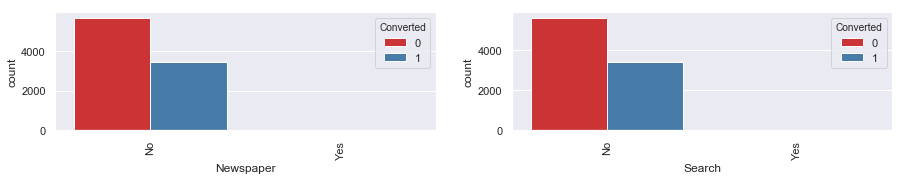

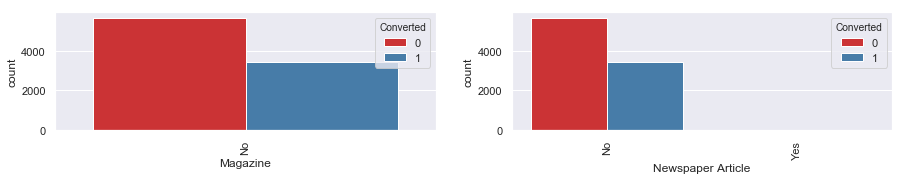

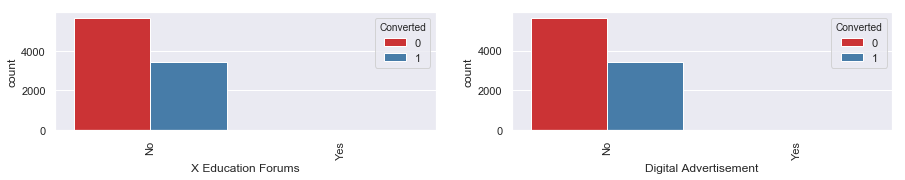

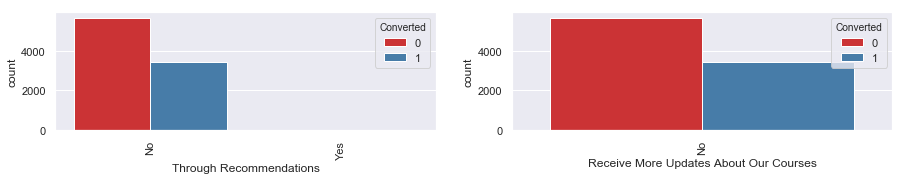

In [49]:
fig, axs = plt.subplots(figsize = (15,10))
# Plot 1
plt.subplot(4, 2, 1)
sns.countplot(x = "Newspaper", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)

# plot 2
plt.subplot(4, 2, 2)
sns.countplot(x = "Search", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)

# plot 3
fig, axs = plt.subplots(figsize = (15,10))
plt.subplot(4, 2, 3)
sns.countplot(x = "Magazine", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)

# plot 4
plt.subplot(4, 2, 4)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)

# plot 5
fig, axs = plt.subplots(figsize = (15,10))
plt.subplot(4, 2, 5)
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)

# plot 6
plt.subplot(4, 2, 6)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)

# plot 7
fig, axs = plt.subplots(figsize = (15,10))
plt.subplot(4, 2, 7)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)

# plot 8
plt.subplot(4, 2, 8)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)


- most of people choose as No in All Advertsing like newspaper,magazine,education form,Newspaper Artical etc..
- Almost all people choose Receive more update about our course as no 

### 11) ' Update me on Supply Chain Content ' , ' Get updates on DM Content ' , ' I agree to pay the amount through cheque ' , ' A free copy of Mastering The Interview '.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

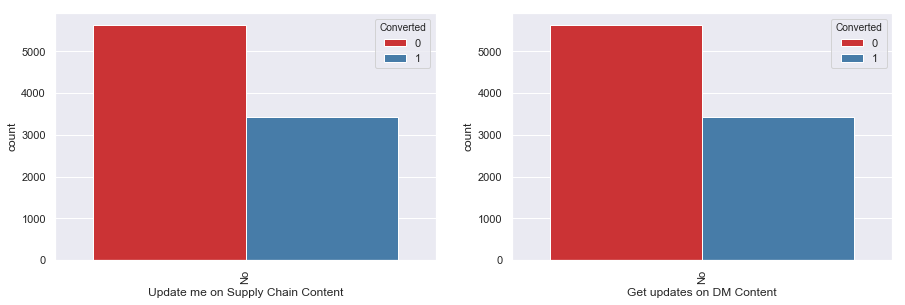

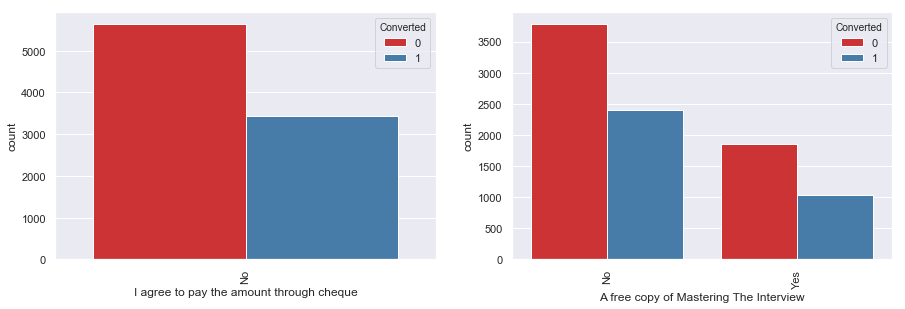

In [50]:
fig, axs = plt.subplots(figsize = (15,10))
# Plot 1 
plt.subplot(2, 2, 1)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)

# Plot 2
plt.subplot(2, 2, 2)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)

# Plot 3
fig, axs = plt.subplots(figsize = (15,10))
plt.subplot(2, 2, 3)
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)

# Plot 4
plt.subplot(2, 2, 4)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)



- As we seen in above plot almost every person choose option as No in 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'.
- in 'A free copy of Mastering The Interview' majority is choose No but there is some people who select yes to get free copy of interview 

### 12) Last Notable Activity

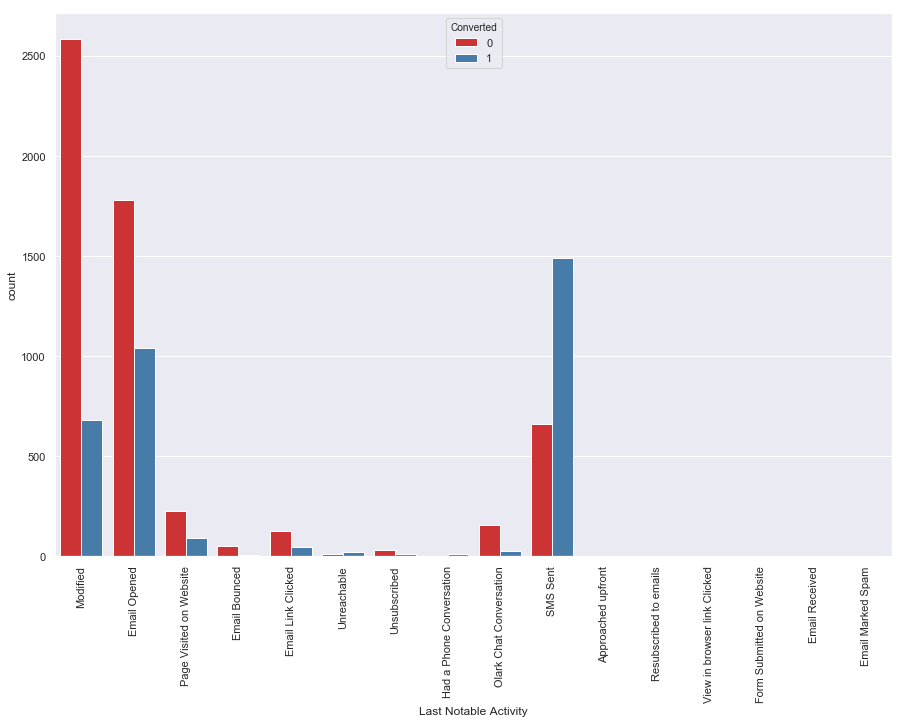

In [51]:
# make the countplot on X axis "Last Notable Activity" 'Hue = Converted which is target variable'
fig, axs = plt.subplots(figsize = (15,10))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)
plt.savefig("Last Notable Activity",bbox_inches='tight')

## 13) Specialization

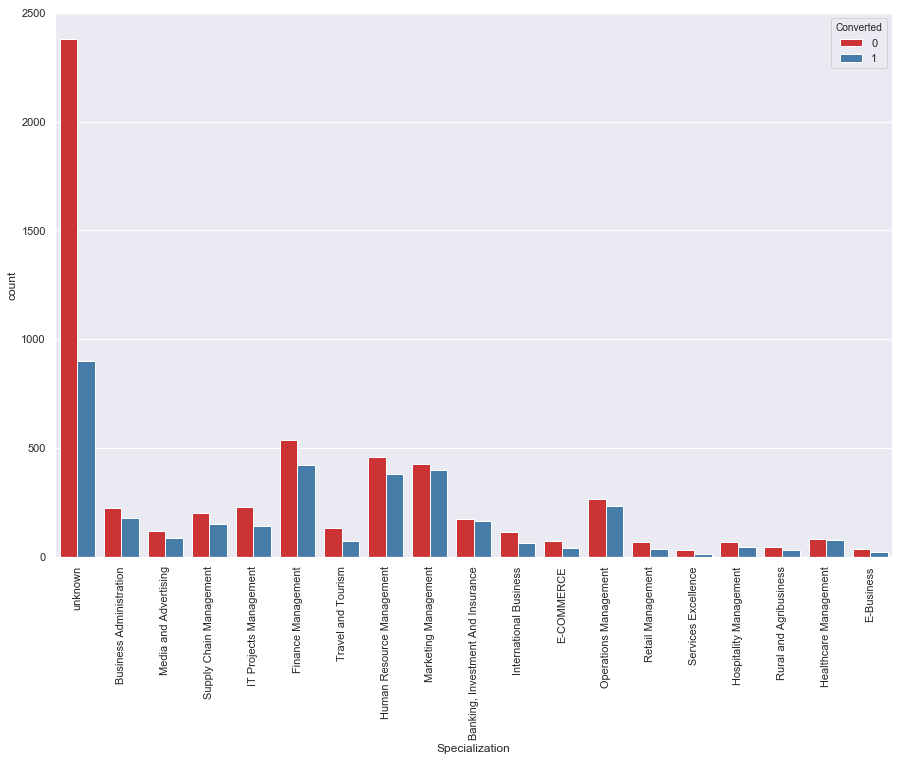

In [52]:
# make the countplot on X axis "Specialization" 'Hue = Converted which is target variable'
fig, axs = plt.subplots(figsize = (15,10))
sns.countplot(x = "Specialization", hue = "Converted", data = lead,palette="Set1")
xticks(rotation = 90)
plt.savefig("Specialization",bbox_inches='tight')

## Final Result Based on EDA

### Based on Analysis we can see some of the column is not much important for the Further Analysis. So we can Drop that Column.

In [53]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,unknown,unknown,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,unknown,unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,unknown,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,unknown,unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,unknown,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,unknown,Mumbai,No,No,Modified


In [54]:
lead = lead.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)

In [55]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,Lead Profile,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,unknown,unknown,unknown,unknown,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,unknown,unknown,unknown,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Potential Lead,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,unknown,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,unknown,Mumbai,Modified


In [56]:
lead.shape

(9074, 17)

In [57]:
lead_sub = lead.copy()

## Step 5 : Check the Correlation Matrix

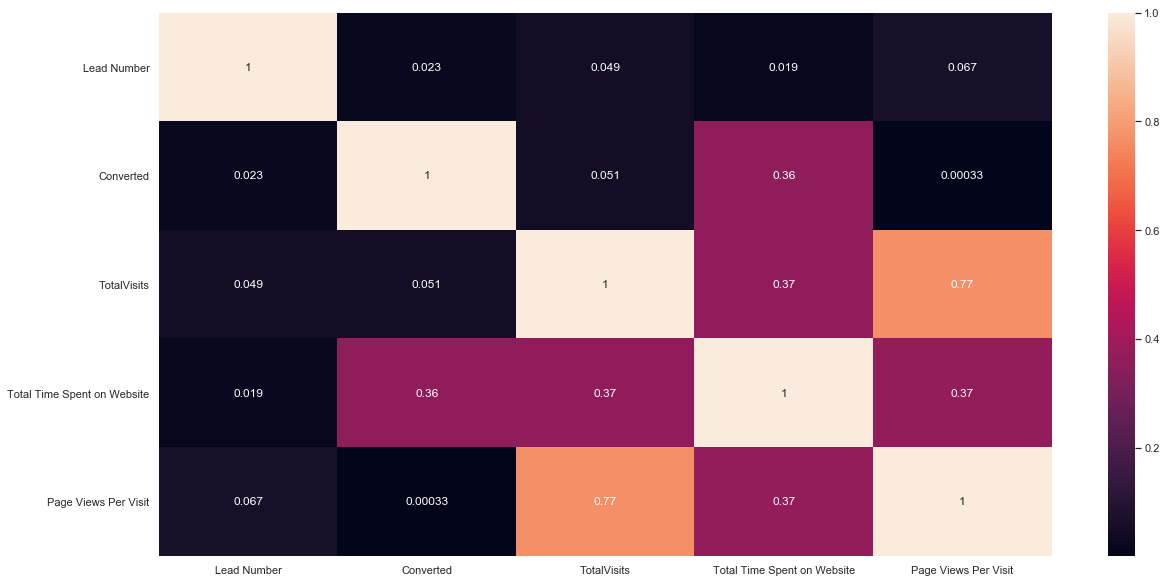

In [58]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead.corr(),annot = True)
plt.savefig("Correlation matrix",bbox_inches='tight')

- As we see in Corelation Matrix there is no highly correlated with each other.

## Step 6 : Data Preparation

#### 6.1 Converting some binary variables (Yes/No) to 0/1

In [59]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,Lead Profile,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,unknown,unknown,unknown,unknown,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,unknown,unknown,unknown,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Potential Lead,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,unknown,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,unknown,Mumbai,Modified


In [60]:
# List of variables to map

varlist =  ['Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [61]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,Lead Profile,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,unknown,unknown,unknown,unknown,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,unknown,unknown,unknown,unknown,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Potential Lead,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,unknown,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,unknown,Mumbai,Modified


#### 6.2 : For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [62]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity','Country','Specialization','How did you hear about X Education',
                              'Lead Profile','City','Last Notable Activity']], drop_first=True)
# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [63]:
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,...,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
dummy1.shape

(9074, 129)

In [65]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,Lead Profile,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,...,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,unknown,unknown,unknown,unknown,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,unknown,unknown,unknown,unknown,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Potential Lead,Mumbai,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,unknown,Mumbai,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,unknown,Mumbai,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [66]:
lead.shape

(9074, 146)

In [67]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity','Country','Specialization','How did you hear about X Education',
                  'Lead Profile','City','Last Notable Activity'], 1)

In [68]:
# check the dataframe head
lead.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,...,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [69]:
lead = lead.set_index('Lead Number')
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,...,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660728,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660681,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Step 7 : Test - Train Split

In [70]:
# Putting feature variable to X
X = lead.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
660727,0,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
660719,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660681,0,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [71]:
# Putting response variable to y
y = lead['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [73]:
X_train.shape

(6351, 134)

In [74]:
X_test.shape

(2723, 134)

## Step 8 : Feature Scaling

In [75]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [76]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
630949,0,0,-0.432779,-0.150296,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
649355,1,0,-0.432779,-0.543632,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
579735,0,0,-1.150329,-0.904666,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
614238,0,0,-0.432779,1.717578,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
588625,0,0,0.643547,2.053909,0.122613,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [77]:
### Checking the Converted Rate
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

37.85541106458012

- As we seen the converted rate is 37.85%.
- Means 37.85% Lead is converted Successfully


## Step 9 Model Building

#### Running Your First Training Model

In [78]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6222
Model Family:                Binomial   Df Model:                          128
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2019   Deviance:                          nan
Time:                        19:49:53   Pearson chi2:                 6.81e+18
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     8.961e+15   1.07e+08   8.35e+07      0.000    8.96e+15    8.96e+15
Do Not Email                                             -3.453e+14   4.47e+06  -7.73e+07      0.000   -3.45e+14   -3.45e+14
Do Not Call                                               6.616e+14   4.79e+07   1.38e+07      0.000    6.62e+14    6.62e+14
TotalVisits                                               1.847e+14   1.45e+06   1.28e+08      0.000    1.85e+14    1.85e+14
Total Time Spent on Website                               6.377e+14   9.97e+05    6.4e+08      0.000    6.38e+14    6.38e+14
Page Views Per Visit                                     -2.046e+14   1.59e+06  -1.29e+08      0.000   -2.05e+14   -2.05e+14
Lead Origin_Landing Page Submission                      -3.825e+14   3.91e+06  -9.79e+07      0.000   -3.82e+14   -3.82e+14
Lead Origin_Lead Add Form                                -1.358e+14   4.76e+07  -2.85e+06      0.000   -1.36e+14   -1.36e+14
Lead Origin_Lead Import                                   4.031e+15   7.22e+07   5.58e+07      0.000    4.03e+15    4.03e+15
Lead Source_Direct Traffic                               -3.278e+14   6.17e+07  -5.31e+06      0.000   -3.28e+14   -3.28e+14
Lead Source_Facebook                                     -3.521e+15   9.39e+07  -3.75e+07      0.000   -3.52e+15   -3.52e+15
Lead Source_Google                                       -1.375e+14   6.17e+07  -2.23e+06      0.000   -1.37e+14   -1.37e+14
Lead Source_Live Chat                                     5.575e+15   6.15e+07   9.07e+07      0.000    5.58e+15    5.58e+15
Lead Source_NC_EDM                                        3.349e+15   9.18e+07   3.65e+07      0.000    3.35e+15    3.35e+15
Lead Source_Olark Chat                                   -4.011e+14   6.15e+07  -6.52e+06      0.000   -4.01e+14   -4.01e+14
Lead Source_Organic Search                               -2.328e+14   6.17e+07  -3.77e+06      0.000   -2.33e+14   -2.33e+14
Lead Source_Pay per Click Ads                            -4.023e+15   9.13e+07  -4.41e+07      0.000   -4.02e+15   -4.02e+15
Lead Source_Press_Release                                -4.487e+15   9.17e+07  -4.89e+07      0.000   -4.49e+15   -4.49e+15
Lead Source_Reference                                     1.942e+15   3.91e+07   4.97e+07      0.000    1.94e+15    1.94e+15
Lead Source_Referral Sites                               -6.605e+13   6.21e+07  -1.06e+06      0.000   -6.61e+13   -6.61e+13
Lead Source_Social Media                                  1.481e+15    7.8e+07    1.9e+07      0.000    1.48e+15    1.48e+15
Lead Source_WeLearn                                          8.9450   7.08e-07   1.26e+07      0.000       8.945       8.945
Lead Source_Welingak Website         

### Step 10: Feature Selection Using RFE

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [80]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True False False  True False False  True  True False False False False
 False  True False False False False False False False  True False False
 False False False False  True False False False False False False  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False  True  True False False False False False False False False
 False False False False False False False False False False  True  True
  True False]
[  1  30  55   1  54  11   1   1  44  97  48  49  17   1  46  93  80   4
  47  71 118   1  81  60  45  67  70  94   1   3  31  69  95  10  50   1
   1  59  13  19  98  61  58  99  41 

In [81]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 30),
 ('TotalVisits', False, 55),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 54),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 44),
 ('Lead Source_Facebook', False, 97),
 ('Lead Source_Google', False, 48),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_NC_EDM', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Pay per Click Ads', False, 93),
 ('Lead Source_Press_Release', False, 80),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Social Media', False, 71),
 ('Lead Source_WeLearn', False, 118),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 81),
 ('Lead Source_blog', False, 60),
 ('Lead Source_google', False, 45),
 ('Lead Source_testone', 

In [83]:
col = X_train.columns[rfe.support_]

In [84]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Lead Profile_Lateral Student',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [85]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       ...
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=119)

#### Assessing the model with StatsModels

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.1
Date:                Mon, 18 Nov 2019   Deviance:                       5076.3
Time:                        19:50:05   Pearson chi2:                 6.51e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.5782      0.057    -27.677      0.000      -1.690      -1.466
Do Not Email                              -1.7780      0.186     -9.550      0.000      -2.143      -1.413
Total Time Spent on Website                1.1489      0.041     27.906      0.000       1.068       1.230
Lead Origin_Lead Add Form                  3.6547      0.227     16.092      0.000       3.210       4.100
Lead Origin_Lead Import                    1.3964      0.472      2.959      0.003       0.472       2.321
Lead Source_Olark Chat                     1.3755      0.108     12.764      0.000       1.164       1.587
Lead Source_Welingak Website               2.5093      0.760      3.300      0.001       1.019       4.000
Last Activity_Converted to Lead           -1.1198      0.217     -5.168      0.000      -1.545      -0.695
Last Activity_Had a Phone Conversation     2.6696      0.757      3.524      0.000       1.185       4.154
Last Activity_Olark Chat Conversation     -1.4469      0.163     -8.860      0.000      -1.767      -1.127
Lead Profile_Lateral Student              22.7768   1.16e+04      0.002      0.998   -2.27e+04    2.28e+04
Lead Profile_Potential Lead                1.9545      0.099     19.790      0.000       1.761       2.148
Lead Profile_Student of SomeSchool        -2.1087      0.488     -4.320      0.000      -3.065      -1.152
Last Notable Activity_SMS Sent             1.6145      0.082     19.761      0.000       1.454       1.775
Last Notable Activity_Unreachable          1.7736      0.493      3.596      0.000       0.807       2.740
Last Notable Activity_Unsubscribed         1.8387      0.549      3.350      0.001       0.763       2.915
==========================================================================================================
"""

In [87]:
col1 = col.drop('Lead Profile_Lateral Student',1)

In [88]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.1
Date:                Mon, 18 Nov 2019   Deviance:                       5098.3
Time:                        19:50:05   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.5643      0.057    -27.567      0.000      -1.675      -1.453
Do Not Email                              -1.7680      0.185     -9.573      0.000      -2.130      -1.406
Total Time Spent on Website                1.1522      0.041     28.033      0.000       1.072       1.233
Lead Origin_Lead Add Form                  3.6732      0.227     16.203      0.000       3.229       4.118
Lead Origin_Lead Import                    1.3899      0.471      2.949      0.003       0.466       2.314
Lead Source_Olark Chat                     1.3700      0.107     12.745      0.000       1.159       1.581
Lead Source_Welingak Website               2.4944      0.760      3.283      0.001       1.005       3.983
Last Activity_Converted to Lead           -1.1334      0.217     -5.231      0.000      -1.558      -0.709
Last Activity_Had a Phone Conversation     2.6566      0.757      3.509      0.000       1.173       4.141
Last Activity_Olark Chat Conversation     -1.4548      0.163     -8.912      0.000      -1.775      -1.135
Lead Profile_Potential Lead                1.9427      0.099     19.682      0.000       1.749       2.136
Lead Profile_Student of SomeSchool        -2.1241      0.488     -4.350      0.000      -3.081      -1.167
Last Notable Activity_SMS Sent             1.6040      0.082     19.661      0.000       1.444       1.764
Last Notable Activity_Unreachable          1.7627      0.493      3.575      0.000       0.796       2.729
Last Notable Activity_Unsubscribed         1.8163      0.548      3.312      0.001       0.741       2.891
==========================================================================================================
"""

In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
630949    0.149639
649355    0.018732
579735    0.225031
614238    0.882743
588625    0.690436
646388    0.759821
632041    0.069278
612248    0.911295
591797    0.690436
646673    0.661683
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14963899, 0.01873231, 0.22503116, 0.88274271, 0.69043642,
       0.75982088, 0.06927803, 0.91129454, 0.69043642, 0.66168272])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.149639,630949
1,0,0.018732,649355
2,0,0.225031,579735
3,1,0.882743,614238
4,1,0.690436,588625


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [92]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,0,0.149639,630949,0
1,0,0.018732,649355,0
2,0,0.225031,579735,0
3,1,0.882743,614238,1
4,1,0.690436,588625,1


In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3444  461]
 [ 683 1763]]


In [95]:
# Predicted     Not Converted    Converted
# Actual
# Not Converted        3409            496
# Converted            1019           1427

In [96]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.819870886474571


### Checking VIFs

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.65
4,Lead Source_Olark Chat,1.57
5,Lead Source_Welingak Website,1.34
8,Last Activity_Olark Chat Conversation,1.34
1,Total Time Spent on Website,1.32
9,Lead Profile_Potential Lead,1.27
11,Last Notable Activity_SMS Sent,1.21
0,Do Not Email,1.09
13,Last Notable Activity_Unsubscribed,1.06
10,Lead Profile_Student of SomeSchool,1.03


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

## Metrics beyond simply accuracy

In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7207686017988553

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.8819462227912932

In [102]:
# Calculate false postive rate - predicting Converted when customer has ot converted
print(FP/ float(TN+FP))

0.11805377720870679


In [103]:
# positive predictive value 
print (TP / float(TP+FP))

0.7927158273381295


In [104]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8345044826750666


### Step 11: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

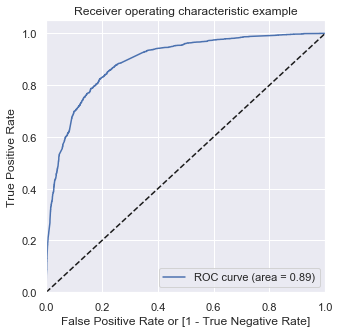

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Step 12: Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.149639,630949,0,1,1,0,0,0,0,0,0,0,0
1,0,0.018732,649355,0,1,0,0,0,0,0,0,0,0,0
2,0,0.225031,579735,0,1,1,1,0,0,0,0,0,0,0
3,1,0.882743,614238,1,1,1,1,1,1,1,1,1,1,0
4,1,0.690436,588625,1,1,1,1,1,1,1,1,0,0,0


In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.648087  0.966885  0.448399
0.2   0.2  0.753267  0.930090  0.642510
0.3   0.3  0.805857  0.854456  0.775416
0.4   0.4  0.819084  0.784955  0.840461
0.5   0.5  0.819871  0.720769  0.881946
0.6   0.6  0.803810  0.621832  0.917798
0.7   0.7  0.790112  0.529436  0.953393
0.8   0.8  0.762557  0.432952  0.969014
0.9   0.9  0.726027  0.312347  0.985147


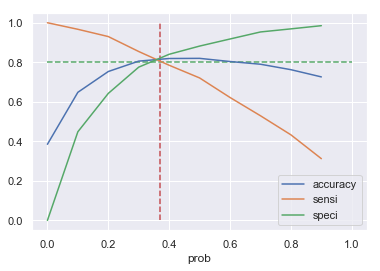

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.37, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.8, xmax=1, xmin=0, colors="gr", linestyles="--")
plt.savefig("Cutoff point",bbox_inches='tight')
plt.show()


#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [111]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.149639,630949,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.018732,649355,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.225031,579735,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.882743,614238,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.690436,588625,1,1,1,1,1,1,1,1,0,0,0,1


In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8138875767595655

In [113]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3202,  703],
       [ 479, 1967]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.804170073589534

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.8199743918053777

In [117]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18002560819462227


In [118]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7367041198501872


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8698723173050802


### Assigning Lead Score

In [120]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

In [121]:
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.149639,630949,0,1,1,0,0,0,0,0,0,0,0,0,15
1,0,0.018732,649355,0,1,0,0,0,0,0,0,0,0,0,0,2
2,0,0.225031,579735,0,1,1,1,0,0,0,0,0,0,0,0,23
3,1,0.882743,614238,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.690436,588625,1,1,1,1,1,1,1,1,0,0,0,1,69


## Precision and Recall

In [122]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3444,  461],
       [ 683, 1763]], dtype=int64)

In [123]:
##### Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7927158273381295

In [124]:
##### Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7207686017988553

Using sklearn utilities for the same

In [125]:
from sklearn.metrics import precision_score, recall_score

In [126]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7927158273381295

In [127]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7207686017988553

### Precision and recall tradeoff

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

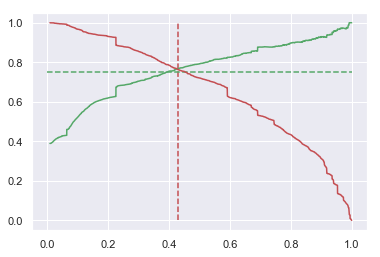

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.43, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.75, xmax=1, xmin=0, colors="gr", linestyles="--")
plt.savefig("Precisiontradeoff",bbox_inches='tight')
plt.show()

### Step 13 : Making predictions on the test set

In [132]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [133]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
628652,0,0,0.304501,-0.596974,0.998931,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
644500,0,0,0.666261,1.983614,1.564920,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
588935,0,0,-0.419021,-0.754931,-0.133048,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
619437,0,0,-1.142542,-0.895759,-1.265027,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
623381,0,0,1.751544,-0.583653,2.130909,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [134]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,
628652,0,-0.596974,0,0,0,0,0,0,0,0,0,0,0,0
644500,0,1.983614,0,0,0,0,0,0,0,1,0,0,0,0
588935,0,-0.754931,0,0,0,0,0,0,0,0,0,0,0,0
619437,0,-0.895759,1,0,0,0,0,0,0,0,0,0,0,0
623381,0,-0.583653,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
X_test_sm = sm.add_constant(X_test)

#### Making Prediction on Test Dataset

In [136]:
y_test_pred = res.predict(X_test_sm)

In [137]:
y_test_pred[:10]

Lead Number
628652    0.095170
644500    0.934863
588935    0.080611
619437    0.745903
623381    0.096500
641959    0.380612
599959    0.329717
613711    0.249565
619391    0.935890
614597    0.226826
dtype: float64

In [138]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [139]:
# Let's see the head
y_pred_1.head()

,0
Lead Number,
628652,0.095170
644500,0.934863
588935,0.080611
619437,0.745903
623381,0.096500


In [140]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [141]:
# Putting Prospect ID to index
y_test_df['Lead Number'] = y_test_df.index

In [142]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [143]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [144]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,628652,0.095170
1,1,644500,0.934863
2,0,588935,0.080611
3,1,619437,0.745903
4,0,623381,0.096500


In [145]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [146]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_prob'], axis=1)

In [147]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_prob
0,628652,0,0.095170
1,644500,1,0.934863
2,588935,0,0.080611
3,619437,1,0.745903
4,623381,0,0.096500


In [148]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [149]:
y_pred_final.head()

,Lead Number,Converted,Converted_prob,final_predicted
0,628652,0,0.095170,0
1,644500,1,0.934863,1
2,588935,0,0.080611,0
3,619437,1,0.745903,1
4,623381,0,0.096500,0


In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8101358795446199

In [151]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1426,  308],
       [ 209,  780]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.788675429726997

In [154]:
# Let us calculate specificity
TN / float(TN+FP)

0.8223760092272203

# So Here is the Logistic Regression Model for Predicting the out comes with an accuracy or 81 %

### Finding top three variables in  model which contribute most towards the probability of a lead getting converted?

In [155]:
Coefficents = pd.Series(res.params, name = "coefficient").to_frame()

In [156]:
Coefficents.sort_values(by=['coefficient'], ascending = False)

,coefficient
Lead Origin_Lead Add Form,3.673208
Last Activity_Had a Phone Conversation,2.656650
Lead Source_Welingak Website,2.494386
Lead Profile_Potential Lead,1.942734
Last Notable Activity_Unsubscribed,1.816341
Last Notable Activity_Unreachable,1.762729
Last Notable Activity_SMS Sent,1.604010
Lead Origin_Lead Import,1.389867
Lead Source_Olark Chat,1.370006
Total Time Spent on Website,1.152160


#### X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

In [157]:
df_1 = y_train_pred_final[['Lead Number','Converted','Converted_prob','final_predicted']]
df_1.head()

,Lead Number,Converted,Converted_prob,final_predicted
0,630949,0,0.149639,0
1,649355,0,0.018732,0
2,579735,0,0.225031,0
3,614238,1,0.882743,1
4,588625,1,0.690436,1


In [158]:
y_pred_final.head()

,Lead Number,Converted,Converted_prob,final_predicted
0,628652,0,0.095170,0
1,644500,1,0.934863,1
2,588935,0,0.080611,0
3,619437,1,0.745903,1
4,623381,0,0.096500,0


In [159]:
# Append the Data to get lead number and final predicted
result = df_1.append(y_pred_final)
result_1 = result[['Lead Number','final_predicted']]

In [160]:
result_1.head()

,Lead Number,final_predicted
0,630949,0
1,649355,0
2,579735,0
3,614238,1
4,588625,1


In [161]:
# merge the Data 
final_df = pd.merge(lead_sub, result_1, on = 'Lead Number' , how = 'right')

In [162]:
final_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,Lead Profile,City,Last Notable Activity,final_predicted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,unknown,unknown,unknown,unknown,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,unknown,unknown,unknown,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Potential Lead,Mumbai,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,unknown,Mumbai,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,unknown,Mumbai,Modified,0


### Lets make a Data Frame of leads predicted as "1" By model

In [163]:
predicated = final_df.loc[final_df['final_predicted'] == 1]

In [164]:
predicated.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,Lead Profile,City,Last Notable Activity,final_predicted
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,unknown,Potential Lead,Mumbai,Email Opened,1
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1557,2.00,Email Opened,India,Supply Chain Management,Online Search,Potential Lead,Mumbai,Modified,1
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8.0,1351,6.00,Email Opened,India,Travel and Tourism,unknown,unknown,Other Metro Cities,Email Opened,1
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,No,1,8.0,1343,2.67,Page Visited on Website,India,Human Resource Management,unknown,unknown,Thane & Outskirts,Page Visited on Website,1
12,8bf76a52-2478-476b-8618-1688e07874ad,660562,API,Organic Search,No,No,1,10.0,1538,6.00,Email Opened,India,Marketing Management,unknown,Potential Lead,unknown,Modified,1
